In [3]:
import cv2
import numpy as np
import os
import albumentations
import matplotlib.pyplot as plt
from pathlib import Path
from rembg import remove, new_session
from PIL import Image
import re 

In [148]:
def augment_stone(stone):
    x = np.random.randint(150, 300)
    stone = cv2.resize(stone, (x, x))
    stone[stone > 200] = 0
    return stone

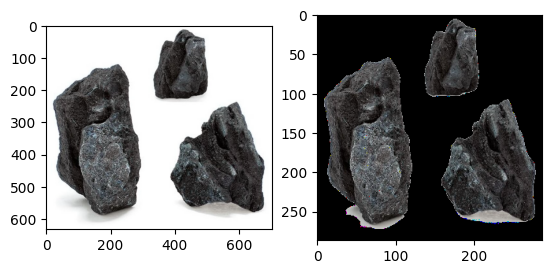

In [149]:
stone = cv2.imread('../data/dz9/rocks/orig.jpg')
aug_stone = augment_stone(stone)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(stone)
ax[1].imshow(aug_stone);

In [140]:
def gen_segment(stone, background_size):
    
    segment = np.zeros(background_size, dtype=np.uint8)
    
    x = np.random.randint(0, background_size[1] - stone.shape[1])
    y = np.random.randint(0, background_size[0] - stone.shape[0])
    
    segment[y: y + stone.shape[0], x: x + stone.shape[1]] = stone
    
    segment_binary = np.zeros(background_size, dtype=np.uint8)
    segment_binary[segment > 0] = 255
    
    return segment, segment_binary

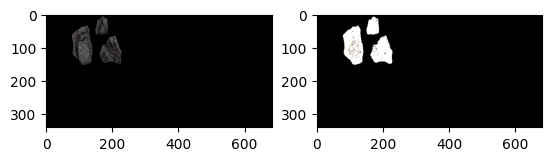

In [142]:
b_image = cv2.imread('../data/dz9/backgrounds/aachen_000002_000019_leftImg8bit.png')
b_image = cv2.resize(b_image, (b_image.shape[1] // 3, b_image.shape[0] // 3))

segment, segment_binary = gen_segment(aug_stone, b_image.shape)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(segment)
ax[1].imshow(segment_binary);

In [143]:
def generate_image(background, stone):
    background[stone > 0] = stone[stone > 0]
    return background

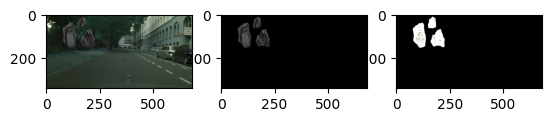

In [145]:
image = generate_image(b_image, segment)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(b_image)
ax[1].imshow(segment);
ax[2].imshow(segment_binary);

In [152]:
def generate_images(data_path, n=1000):
    backs_path = os.path.join(data_path, 'backgrounds')
    rocks_path = os.path.join(data_path, 'rocks')
    backs_paths = [os.path.join(backs_path, i) for i in sorted(os.listdir(backs_path))]
    rocks_paths = [os.path.join(rocks_path, i) for i in sorted(os.listdir(rocks_path))]
    
    for i in range(n):
        for j in range(len(backs_paths)):
            for k in range(len(rocks_paths)):
#         back_ind = np.random.randint(0, len(backs_paths) - 1)
#         rock_ind = np.random.randint(0, len(rocks_paths) - 1)
    
                back = cv2.imread(backs_paths[j])
                back = cv2.resize(back, (back.shape[1] // 3, back.shape[0] // 3))
                rock = cv2.imread(rocks_paths[k])

                rock = augment_stone(rock)
                segment, segment_binary = gen_segment(rock, back.shape)
                im = generate_image(back, segment)

                im_file_name = f'../data/dz9/generated/image/{i}{j}{k}.png'
                seg_file_name = f'../data/dz9/generated/segment/{i}{j}{k}.png'
                seg_bin_file_name = f'../data/dz9/generated/segment_binary/{i}{j}{k}.png'

                cv2.imwrite(im_file_name, im)
                cv2.imwrite(seg_file_name, segment)
                cv2.imwrite(seg_bin_file_name, segment_binary)

#             if i % 10 == 0:
        print(i)

In [ ]:
generate_images('../data/dz9/', 5)